<a href="https://colab.research.google.com/github/Cate28/Parte-pr-ctica-segundo-parcial/blob/main/Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


En este trabajo se realiza un análisis estadístico de la base de datos de nacimientos en Colombia en el año 2020, proporcionada por el Departamento Administrativo Nacional de Estadística (DANE). La base de datos, nac2020.csv contiene información detallada proveniente de los certificados de nacido vivo, lo cual permite explorar diversas variables relevantes para la comprensión de los patrones demográficos de salud en el país.

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_nac2020.csv to asriosgu_nac2020.csv


In [ ]:
io_csv = io.BytesIO(uploaded['asriosgu_nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
df = tabla[["EDAD_PADRE", "N_EMB"]]
df.head(3)

,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1


In [ ]:
df1 = df[(df.EDAD_PADRE < 120) & (df.N_EMB != 99)]
df1.head(5)

,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1
44,20,1
44,20,1


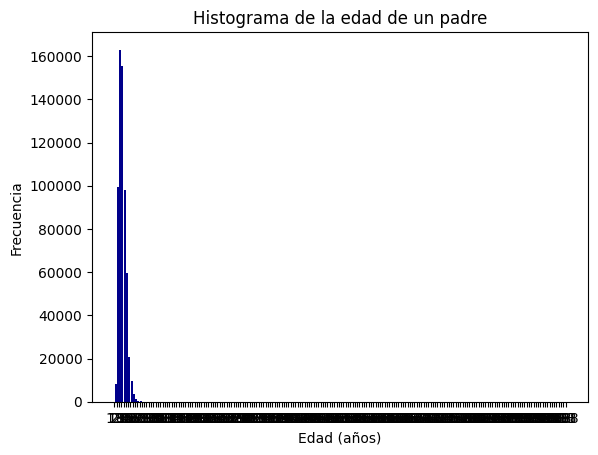

In [ ]:
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE) + 1, 5)
plt.hist(df.EDAD_PADRE, bins=intervalos, color='darkblue', rwidth=0.85)
plt.title('Histograma de la edad de un padre')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

* En el histograma de frecuencias de la edad de un padre no se puede apreciar muy bien, pero se puede observar que la distribucion es asimétrica a la derecha.

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()
import pandas as pd
import numpy as np
datos = pd.read_csv('asriosgu_nac2020.csv', encoding='latin-1')
datos.head()
datos.describe()

Saving asriosgu_nac2020.csv to asriosgu_nac2020 (1).csv


,COD_DPTO,COD_MUNIC,AREANAC,SIT_PARTO,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,CODMUNRE,AREA_RES,N_HIJOSV,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
count,629402.000000,629402.000000,629402.000000,629402.000000,629402.000000,629402.000000,629402.000000,629402.0,629402.000000,629402.00000,...,619602.000000,619613.000000,629402.000000,629402.000000,629402.000000,557253.000000,629402.000000,629402.000000,629402.000000,629402.000000
mean,34.051180,167.547714,1.047308,1.029172,1.487116,5.773569,4.632049,2020.0,6.618501,1.10806,...,249.370349,1.391238,1.927412,2.096495,2.014112,1.668540,44.011153,14.428720,17.257376,1.060675
std,26.504166,264.063173,0.291968,0.179535,0.500019,1.112653,0.726446,0.0,3.450410,0.66353,...,296.851528,0.746216,1.216957,1.366276,1.182725,0.684428,117.241467,28.943783,28.066634,0.470205
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.0,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,0.000000,1.000000
25%,11.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,2020.0,4.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,3.000000,5.000000,1.000000
50%,23.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,2020.0,7.000000,1.00000,...,88.000000,1.000000,2.000000,2.000000,2.000000,2.000000,29.000000,4.000000,9.000000,1.000000
75%,54.000000,276.000000,1.000000,1.000000,2.000000,6.000000,5.000000,2020.0,10.000000,1.00000,...,490.000000,1.000000,2.000000,3.000000,2.000000,2.000000,35.000000,8.000000,11.000000,1.000000
max,99.000000,980.000000,3.000000,3.000000,3.000000,9.000000,9.000000,2020.0,12.000000,6.00000,...,980.000000,9.000000,99.000000,99.000000,5.000000,5.000000,999.000000,99.000000,99.000000,5.000000


In [ ]:
datos['EDAD_PADRE'].median()


29.0

In [ ]:
datos['EDAD_PADRE'].mode()

0    30
Name: EDAD_PADRE, dtype: int64

In [ ]:
datos['N_EMB'].median()

2.0

In [ ]:
datos['N_EMB'].mode()

0    1
Name: N_EMB, dtype: int64

* Ya que la media es de 44.011153 esto me indica que, en promedio, los padres tienen alrededor de 44 años.
*	Como ya sabemos la mediana es el valor que separa la mitad superior de la mitad inferior de los datos. Una mediana de 29.0 sugiere que el 50% de los padres tienen 29 años o menos, y el otro 50% tiene 29 años o más.
*	Según los datos que sacamos en Python la moda es de 30 esto indica que 30 años es la edad más común entre los padres.
*	Una desviación estándar de 117.241467 es extremadamente alta, lo que sugiere que hay una gran variabilidad en las edades de los padres. Este valor parece sospechosamente alto, y podría indicar que hay datos atípicos que están afectando el cálculo.  
*	De acuerdo con los cálculos de los cuantiles, se puede ver que:
1.	25% (24.000000): El 25% de los padres tienen 24 años o menos.
2.	50% (29.000000): Este es también el valor de la mediana, indicando que el 50% de los padres tienen 29 años o menos.
3.	5% (35.000000): El 75% de los padres tienen 35 años o menos.
*	En cuanto a su distribución, la gran diferencia entre la media y la mediana, junto con una desviación estándar tan alta, sugiere que la distribución de edades no es simétrica y podría estar sesgada a la derecha (hacia edades mayores), además, de que esto se puede ver el histograma de frecuencias. Asimismo, esto puede deberse a la presencia de algunos padres mucho mayores que la mayoría.



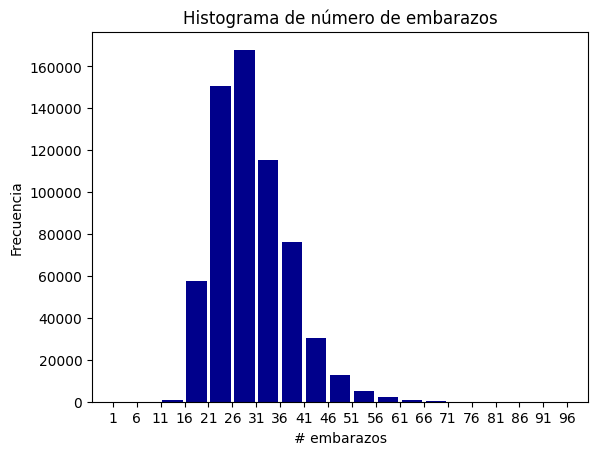

In [ ]:
intervalos = range(min(df.N_EMB), max(df.N_EMB) + 1, 5)
plt.hist(df.EDAD_PADRE, bins=intervalos, color='darkblue', rwidth=0.85)
plt.title('Histograma de número de embarazos')
plt.xlabel('# embarazos')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

En este histograma se puede observar que el rango entre 26  y 31 embarazos presenta una frecuencia de más de 160000, es decir, que la moda de estos datos se encuentran entre [26-31].
También, se puede ver que la gráfica presenta una distribución con asimetría hacia la derecha, ya que los datos se acumulan hacia el lado derecho.

De acuerdo a los calculos anteriormente observados se puede ver que:
*	Una media de 2.096495 indica que, en promedio, las personas tienen aproximadamente 2 embarazos.
*	Una mediana de 2.0 sugiere que el 50% de las personas tienen 2 embarazos o menos, y el otro 50% tiene 2 embarazos o más.
*	Una moda de 1 indica que 1 embarazo es el número más común entre las personas.
*	Una desviación estándar de 1.366276 indica que hay una variabilidad moderada en el número de embarazos. La mayoría de los valores están relativamente cerca de la media, pero hay alguna dispersión.
*	 De acuerdo con los cálculos de los cuantiles, se puede ver que:
1.	 25% (1.000000): El 25% de las personas tienen 1 embarazo o menos.
2.	50% (2.000000): Este es también el valor de la mediana, indicando que el 50% de las personas tienen 2 embarazos o menos.
3.	75% (3.000000): El 75% de las personas tienen 3 embarazos o menos.
*La media y la mediana son muy cercanas (2.096495 y 2.0 respectivamente), lo que sugiere que la distribución del número de embarazos es aproximadamente simétrica. La moda de 1 indica que tener 1 embarazo es lo más común, pero también hay un número significativo de personas con 2 y 3 embarazos, como se observa en los cuantiles.

*La desviación estándar de 1.366276 sugiere una variabilidad moderada en el número de embarazos. Esto significa que aunque la mayoría de las personas tienen entre 1 y 3 embarazos, algunos pueden tener más.

*Los cuantiles indican una distribución en la que el 25% de las personas tienen 1 embarazo o menos, la mitad tiene 2 embarazos o menos, y el 75% tiene 3 embarazos o menos. Esto muestra una progresión relativamente uniforme en la cantidad de embarazos.



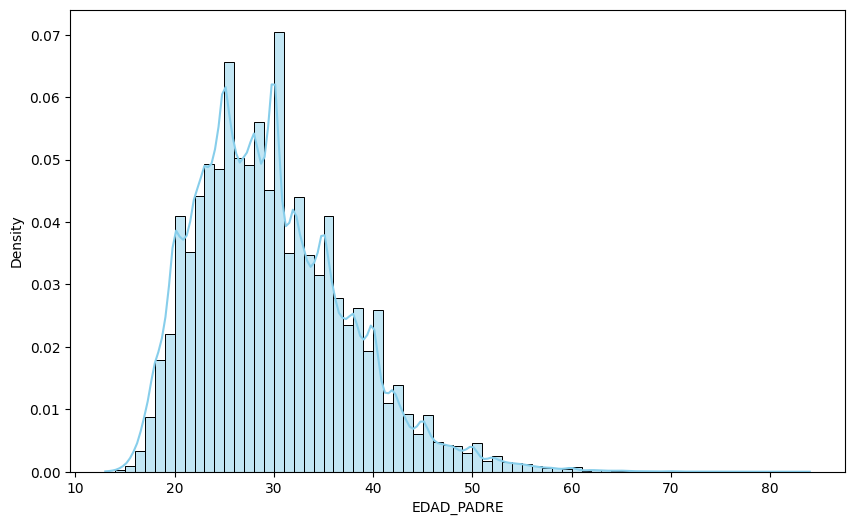

In [ ]:
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.EDAD_PADRE, bins = intervalos1, kde = True, stat = "density", color = "skyblue", edgecolor='black') # kde = True es la gráfica de la función de densidad de probabilidad estimada por un método Kernell

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))

<ipython-input-15-cbfc31be47a0>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color = "darkblue")


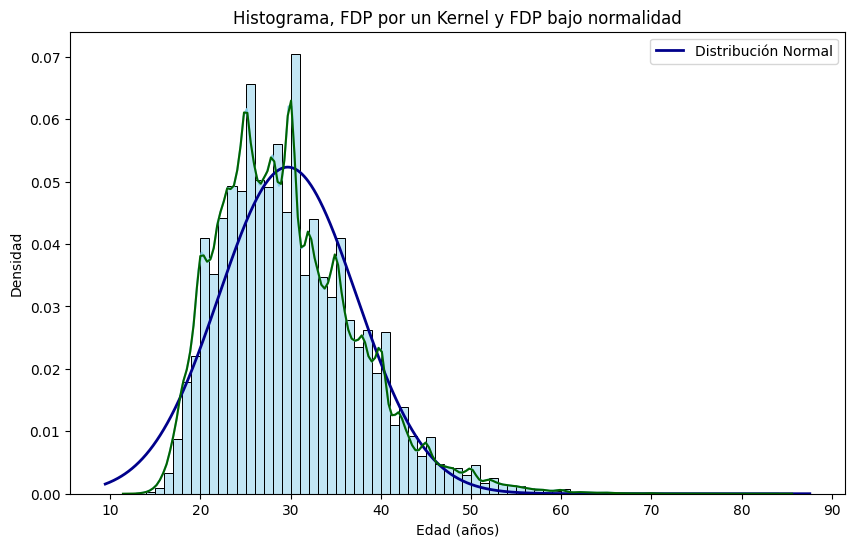

In [ ]:
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.EDAD_PADRE, bins = intervalos1, kde = True, stat = "density", color = "skyblue", edgecolor='black') # kde = True es la gráfica de la función de densidad de probabilidad estimada por un método Kernell

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))

plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color = "darkblue")
sns.kdeplot(x=df1.EDAD_PADRE, color = "darkgreen")

plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad')
plt.xlabel('Edad (años)')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

De acuerdo a la linea azul que cumple con las condiciones para que la variable pueda darse bajo condiciones de normalidad se puede observar que esta no cumple con este supuesto  ya que hay valores atipicos muy dispersos que se ayuda ver mediante el grafico que no cumplen las condiciones necesarias de normalidad


<Axes: xlabel='N_EMB', ylabel='Density'>

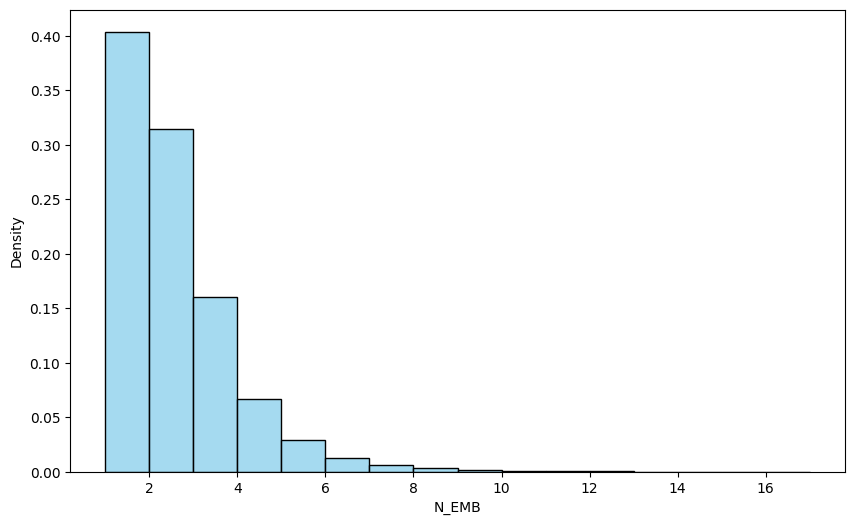

In [ ]:
intervalos1 = range(min(df1.N_EMB), max(df1.N_EMB) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalos1, kde = False, stat = "density", color = "skyblue", edgecolor='black') # kde = True es la gráfica de la función de densidad de probabilidad estimada por un método Kernell

De acuerdo a los graficos anteriores

*La edad del padre tiene una desviación estándar extremadamente alta (117.241467), lo que sugiere la presencia de datos atípicos que pueden distorsionar las estadísticas descriptivas. En contraste, la desviación estándar del número de embarazos es moderada (1.366276), indicando una menor variabilidad.

*Podría sugerir que a medida que la edad del padre aumenta,  el número de embarazos va avanzando de manera moderada. Esto podría interpretarse en contextos donde los padres mayores tienden a tener más hijos debido a factores sociales, culturales o económicos.

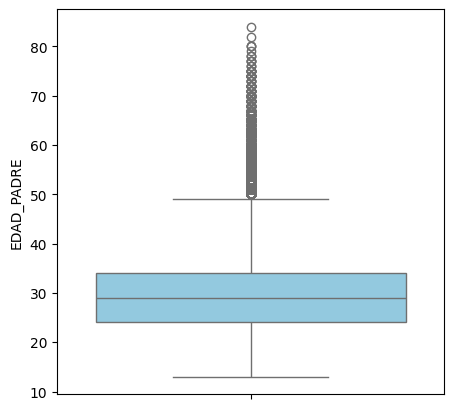

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(df1.EDAD_PADRE, color='skyblue', saturation=0.75)
plt.show()

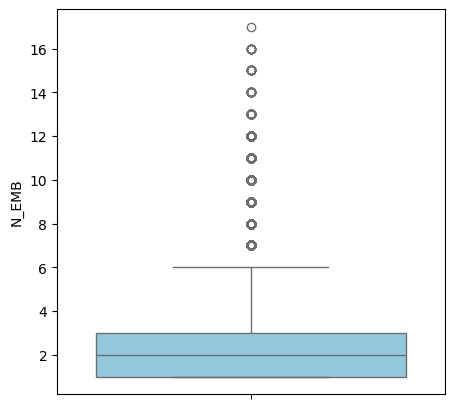

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(df1.N_EMB, color='skyblue', saturation=0.75)
plt.show()

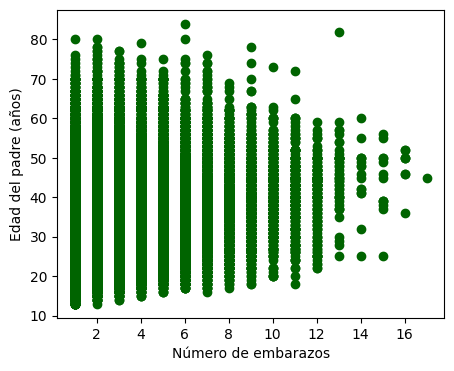

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color = "darkgreen", marker = "o")
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre (años)')
plt.show()

In [ ]:
modelo = LinearRegression()
# df1["N_EMB"] es igual a escribir df1.N_EMB
modelo.fit(np.array(df1.N_EMB).reshape(-1, 1), np.array(df1["EDAD_PADRE"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(df1.N_EMB).reshape(-1, 1))
predi_lineal

array([[27.43534225],
       [27.43534225],
       [27.43534225],
       ...,
       [29.47056813],
       [27.43534225],
       [27.43534225]])

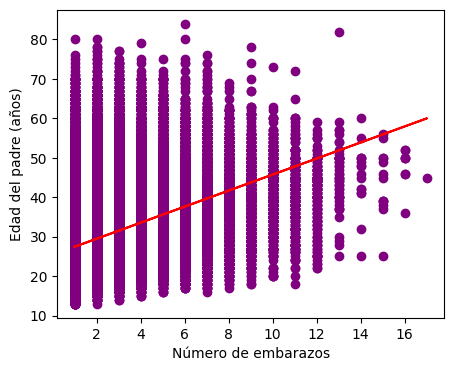

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color = "purple", marker = "o")
plt.plot(df1["N_EMB"], predi_lineal, linestyle='-', color = "red")
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre (años)')
plt.show()

In [ ]:
coef_pearson = np.corrcoef(df1["N_EMB"], df1["EDAD_PADRE"])[0, 1]
coef_spearman, _ = spearmanr(df1["N_EMB"], df1["EDAD_PADRE"])
coef_kendall, _ = kendalltau(df1["N_EMB"], df1["EDAD_PADRE"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson}, {coef_spearman} y {coef_kendall}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3529583266676772, 0.37985917047049816 y 0.29686774207661487.


De a partir de las gráficas y de los coeficientes de correlación encontrados se puede analizar que entre las dos variables que son el número de embarazos y la edad de un padre de un recién nacido presentan una correlación positiva ya que en la gráfica se observa que las dos variables van aumentando, es decir, se forma una línea recta.
Por otra parte, se puede ver que el coeficiente de correlación de Spearman es igual a 0.37985917047049816 lo que quiere decir es que es positivo y además, que su función es no monótona, es decir, que la variable X:= "Números de embarazos" va en aumento y la variable Y:= "Edad del padre de un recién nacido en Colombia" algunas veces disminuye.
